# create_banner_plot
- Creates banner plot (i.e. galaxy images with classification labels) for repo

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
data_dir = '../data/cleaned_datasets/'

X_test = np.load(data_dir + 'X_test.npy')
y_test = np.load(data_dir + 'y_test.npy')

### loading model and generating predictions

In [3]:
final_model = keras.models.load_model('../NN/final-model/saved-model-35-0.02.hdf5')
y_predicted = final_model.predict(X_test).ravel()

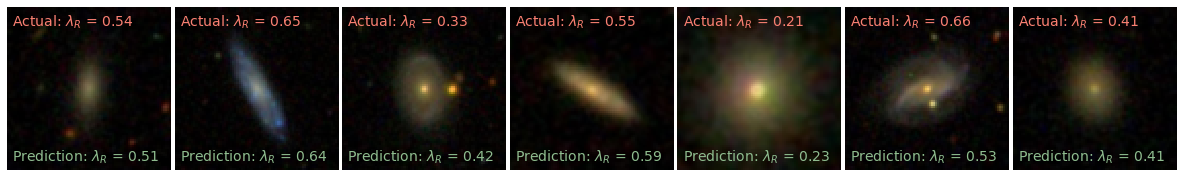

In [5]:
fig, ax = plt.subplots(1, 7, figsize=(25, 3))

for a in ax.ravel():
    # generating random galaxy
    ind = np.random.randint(y_test.shape)
    a.imshow(np.squeeze(X_test[ind]))
    a.axis('off')
    label = 'Actual: $\lambda_R$ = {:1.2}'.format(y_test[ind][0])
    a.annotate(label, xy=(2, 9), color='salmon', fontsize=14)
    label = 'Prediction: $\lambda_R$ = {:1.2}'.format(y_predicted[ind][0])
    a.annotate(label, xy=(2, 75), color='darkseagreen', fontsize=14)
    
fig.subplots_adjust(wspace=-0.57, hspace=0)
plt.savefig('../plots/prediction_banner.png', format='png', dpi=250, bbox_inches='tight')